# Humanitarian Task Image Classification 

In this notebook, we use a pre-trained Inception v3 image classifier to classify tweet images for humanitarian task classification.

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [1]:
!pip install stanza

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 802 kB 3.7 MB/s eta 0:00:01
     |████████████████                | 310.7 MB 130.9 MB/s eta 0:00:03

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████▊       | 479.4 MB 137.3 MB/s eta 0:00:02

     |█████████████████████████       | 486.1 MB 137.3 MB/s eta 0:00:01

     |█████████████████████████▌      | 492.9 MB 137.3 MB/s eta 0:00:01

     |█████████████████████████▉      | 499.7 MB 137.3 MB/s eta 0:00:01

     |██████████████████████████▏     | 506.4 MB 137.3 MB/s eta 0:00:01

     |██████████████████████████▌     | 513.1 MB 137.3 MB/s eta 0:00:01

     |██████████████████████████▉     | 519.9 MB 137.3 MB/s eta 0:00:01

     |███████████████████████████▏    | 526.5 MB 133.7 MB/s eta 0:00:01

     |███████████████████████████▌    | 533.2 MB 133.7 MB/s eta 0:00:01

     |███████████████████████████▉    | 540.0 MB 133.7 MB/s eta 0:00:01

     |████████████████████████████▎   | 546.7 MB 133.7 MB/s eta 0:00:01

     |████████████████████████████▋   | 553.5 MB 133.7 MB/s eta 0:00:01

     |█████████████████████████████   | 560.3 MB 133.7 MB/s eta 0:00:01

     |█████████████████████████████▎  | 567.1 MB 133.7 MB/s eta 0:00:01

     |█████████████████████████████▋  | 573.7 MB 133.7 MB/s eta 0:00:01

     |██████████████████████████████  | 580.5 MB 133.7 MB/s eta 0:00:01

     |██████████████████████████████▎ | 587.2 MB 133.7 MB/s eta 0:00:01

     |██████████████████████████████▋ | 594.0 MB 133.7 MB/s eta 0:00:01

     |███████████████████████████████ | 600.7 MB 133.7 MB/s eta 0:00:01

     |███████████████████████████████▍| 607.5 MB 133.7 MB/s eta 0:00:01

     |███████████████████████████████▊| 614.2 MB 133.7 MB/s eta 0:00:01

     |████████████████████████████████| 619.9 MB 133.7 MB/s eta 0:00:01

     |████████████████████████████████| 619.9 MB 43 kB/s 
     |████████████████████████████████| 302 kB 102.8 MB/s eta 0:00:01
     |████████████████████████████████| 240 kB 106.4 MB/s eta 0:00:01
     |████████████████████████████████| 102.6 MB 7.7 kB/s s eta 0:00:01
     |████████████████████████████████| 11.8 MB 100.0 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 1.4 MB/s s eta 0:00:01
     |████████████████████████████████| 63.2 MB 105.9 MB/s eta 0:00:01
     |████████████████████████████████| 168.4 MB 134.8 MB/s eta 0:00:01
     |████████████████████████████████| 177.1 MB 81 kB/s /s eta 0:00:01
     |███████████████████████████▉    | 276.0 MB 129.2 MB/s eta 0:00:01

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 317.1 MB 56 kB/s 
     |████████████████████████████████| 173.2 MB 132.4 MB/s eta 0:00:01     |████████████████████████████████| 173.2 MB 132.4 MB/s 
     |████████████████████████████████| 849 kB 105.0 MB/s eta 0:00:01
     |████████████████████████████████| 54.6 MB 106.6 MB/s eta 0:00:01
     |██████████████▍                 | 251.0 MB 132.9 MB/s eta 0:00:03   |████▌                           | 77.5 MB 98.4 MB/s eta 0:00:05

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |██████████████████████▋         | 393.2 MB 134.6 MB/s eta 0:00:02

     |███████████████████████         | 399.6 MB 134.6 MB/s eta 0:00:02

     |███████████████████████▎        | 406.0 MB 134.6 MB/s eta 0:00:02

     |███████████████████████▊        | 412.2 MB 134.6 MB/s eta 0:00:02

     |████████████████████████        | 418.6 MB 134.6 MB/s eta 0:00:02

     |████████████████████████▍       | 425.0 MB 134.6 MB/s eta 0:00:01

     |████████████████████████▊       | 431.3 MB 134.6 MB/s eta 0:00:01

     |█████████████████████████▏      | 437.7 MB 134.6 MB/s eta 0:00:01

     |█████████████████████████▌      | 444.0 MB 134.6 MB/s eta 0:00:01

     |█████████████████████████▉      | 450.3 MB 134.6 MB/s eta 0:00:01

     |██████████████████████████▎     | 456.7 MB 134.6 MB/s eta 0:00:01

     |██████████████████████████▋     | 462.9 MB 134.6 MB/s eta 0:00:01

     |███████████████████████████     | 469.0 MB 134.6 MB/s eta 0:00:01

     |███████████████████████████▎    | 475.2 MB 134.6 MB/s eta 0:00:01

     |███████████████████████████▋    | 481.3 MB 134.6 MB/s eta 0:00:01

     |████████████████████████████    | 487.3 MB 134.6 MB/s eta 0:00:01

     |████████████████████████████▍   | 493.4 MB 134.6 MB/s eta 0:00:01

     |████████████████████████████▊   | 499.4 MB 134.6 MB/s eta 0:00:01

     |█████████████████████████████   | 505.5 MB 134.6 MB/s eta 0:00:01

     |█████████████████████████████▍  | 511.5 MB 133.3 MB/s eta 0:00:01

     |█████████████████████████████▊  | 517.4 MB 133.3 MB/s eta 0:00:01

     |██████████████████████████████  | 523.4 MB 133.3 MB/s eta 0:00:01

     |██████████████████████████████▍ | 529.4 MB 133.3 MB/s eta 0:00:01

     |██████████████████████████████▊ | 535.4 MB 133.3 MB/s eta 0:00:01

     |███████████████████████████████ | 541.4 MB 133.3 MB/s eta 0:00:01

     |███████████████████████████████▍| 547.3 MB 133.3 MB/s eta 0:00:01

     |███████████████████████████████▊| 553.2 MB 133.3 MB/s eta 0:00:01

     |████████████████████████████████| 557.1 MB 133.3 MB/s eta 0:00:01

     |████████████████████████████████| 557.1 MB 18 kB/s 
     |████████████████████████████████| 21.0 MB 102.0 MB/s eta 0:00:01
     |████████████████████████████████| 24.0 MB 96.9 MB/s eta 0:00:01
     |████████████████████████████████| 137 kB 105.1 MB/s eta 0:00:01
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234906 sha256=a98b0becca975434aa354177eccc0339cff0bc9f829da7988282bebd1dbce8af
  Stored in directory: /storage/home/hcocice1/sverma324/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
  Created wheel for lit: filename=lit-16.0.1-py3-none-any.whl size=88192 sha256=14530c820eb0ac9bb3090fdd65e7ddcc3f3d35738a706d8ddca23828c67871c6
  Stored in directory: /storage/home/hcocice1/sverma324/.cache/pip/wheels/12/14/ba/87be46a564f97692e6cd1f6d7a1deeb5bff2821d45a52e8d7a
Successfully built emoji lit
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this d

In [4]:
!conda config --append channels conda-forge

In [10]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 61.8 MB 3.7 MB/s eta 0:00:01


In [1]:
import torch
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
import csv
import math
import pickle
import stanza
import cv2
import copy
import seaborn as sns
import time
from PIL import Image
from sklearn import metrics

from torch.utils.data.sampler import BatchSampler, RandomSampler, Sampler, \
    SequentialSampler, SubsetRandomSampler
from torch.utils.data import Dataset
from torch.nn import functional
from torch import nn
from tqdm import tqdm
from sklearn.metrics import accuracy_score, confusion_matrix, \
    precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict, OrderedDict, Counter
from json import load, dump
from torchvision import datasets, models, transforms

In [2]:
torch.cuda.is_available()

True

In [3]:
# torch.cuda.device_count(),\
torch.cuda.get_device_name(0),\
# torch.cuda.get_device_name(1)

('Quadro RTX 6000',)

## 1. Load Datafiles

In [4]:
import os
os.getcwd()
# os.chdir("d:\\Spring 2023\\7643 Deep Learning\\Project\\multimodality-language-disparity\\image-models\\")

'/storage/home/hcocice1/sverma324/data'

In [5]:
os.getcwd()

'/storage/home/hcocice1/sverma324/data'

In [ ]:
# %cd /content/drive/MyDrive/Deep Learning Project/multimodality-language-disparity/

/content/drive/.shortcut-targets-by-id/1b7VfEFzCy4Rm7STBTRa_tqS3ENtmh8dO/Deep Learning Project/multimodality-language-disparity


In [6]:
train_split_df = pd.read_csv('crisis-mmd/task_humanitarian_text_img_train.tsv', sep='\t')

In [7]:
train_split_df.head()

event_name            tweet_id              image_id  \
0  california_wildfires  917791291823591425  917791291823591425_1   
1  california_wildfires  917791291823591425  917791291823591425_0   
2  california_wildfires  917793137925459968  917793137925459968_0   
3  california_wildfires  917793137925459968  917793137925459968_1   
4  california_wildfires  917793137925459968  917793137925459968_2   

                                          tweet_text  \
0  RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...   
1  RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...   
2  RT @KAKEnews: California wildfires destroy mor...   
3  RT @KAKEnews: California wildfires destroy mor...   
4  RT @KAKEnews: California wildfires destroy mor...   

                                               image  \
0  data_image/california_wildfires/10_10_2017/917...   
1  data_image/california_wildfires/10_10_2017/917...   
2  data_image/california_wildfires/10_10_2017/917...   
3  data_image/california_wildfires/10_10_2017/917...   
4  data_image/california_wildfires/10_10_2017/917...   

                               label                         label_text  \
0                   not_humanitarian         other_relevant_information   
1         other_relevant_information         other_relevant_information   
2  infrastructure_and_utility_damage  infrastructure_and_utility_damage   
3  infrastructure_and_utility_damage  infrastructure_and_utility_damage   
4  infrastructure_and_utility_damage  infrastructure_and_utility_damage   

                         label_image label_text_image  
0                   not_humanitarian         Negative  
1  infrastructure_and_utility_damage         Negative  
2  infrastructure_and_utility_damage         Positive  
3  infrastructure_and_utility_damage         Positive  
4  infrastructure_and_utility_damage         Positive

In [8]:
labels = Counter(train_split_df['label'])
labels

Counter({'not_humanitarian': 5260,
         'other_relevant_information': 3294,
         'infrastructure_and_utility_damage': 1905,
         'vehicle_damage': 134,
         'affected_individuals': 424,
         'rescue_volunteering_or_donation_effort': 2323,
         'injured_or_dead_people': 244,
         'missing_or_found_people': 24})

In [9]:
label_map = {
    'affected_individuals': 0,
    'infrastructure_and_utility_damage': 1,
    'not_humanitarian': 2,
    'other_relevant_information': 3,
    'rescue_volunteering_or_donation_effort': 4,
    'vehicle_damage': 1,
    'injured_or_dead_people': 0,
    'missing_or_found_people': 0
}

In [10]:
'data/crisis-mmd/{}'.format(train_split_df.iloc[4, 4])

'data/crisis-mmd/data_image/california_wildfires/10_10_2017/917793137925459968_2.jpg'

In [11]:
def image_transform(image):

    h, w, _ = image.shape
    target_len = 299
    padded_image = np.zeros((target_len, target_len, 3)).astype(int)


    if w > h:
        # Resize to [] x 299
        image = cv2.resize(image, (target_len, math.floor(h / (w / target_len))))
        short_len = image.shape[0]

        # Pad to 299 x 299
        padded_image[math.floor((target_len - short_len) / 2):
                     math.floor((target_len - short_len) / 2) + short_len,
                     :, :] = image
    else:
        # Resize to 299 x []
        image = cv2.resize(image, (math.floor(w / (h / target_len)), target_len))
        short_len = image.shape[1]

        # Pad to 299 x 299
        padded_image[:, math.floor((target_len - short_len) / 2):
                     math.floor((target_len - short_len) / 2) + short_len,
                     :] = image
    
    return padded_image

image = cv2.imread('crisis-mmd/{}'.format(train_split_df.iloc[3, 4]))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# image

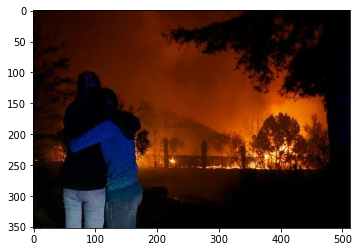

In [12]:
plt.imshow(image)
plt.show()

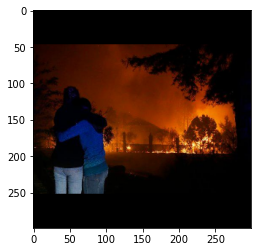

In [13]:
plt.imshow(image_transform(image))
plt.show()

In [14]:
class ImageDataset(Dataset):

    def __init__(self, tsv_file, root_dir):
        """
        Args:
            tsv_file (string): Path to the train/test/dev split tsv file
            root_dir (string): Directory with all the images.
        """
        self.file_df = pd.read_csv(tsv_file, sep='\t')
        self.root_dir = root_dir
        self.normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

    def __len__(self):
        return len(self.file_df)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.file_df.iloc[idx, 4])
        image = cv2.imread(img_name)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Resize one dimension of image to 299
        image = image_transform(image)
        
        # Swap axis
        image = image.transpose((2, 0, 1))
        
        # Normalize the image
        image = image / 255
        image = torch.from_numpy(image)
        image = self.normalize(image).float()
        
        # Get the label
        label = label_map[self.file_df.iloc[idx, 5]]
        
        return image, label

In [15]:
train_dataset = ImageDataset('crisis-mmd/task_humanitarian_text_img_train.tsv',
                             'crisis-mmd')

In [16]:
a,b = train_dataset.__getitem__(2)

In [21]:
a.shape

torch.Size([3, 299, 299])

In [22]:
b

1

In [17]:
for i in train_dataset:
    print(i[0].shape, i[1])
    break

torch.Size([3, 299, 299]) 2


## 2. Fine-tune Inception v3

In [17]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [14]:
!sudo lshw -C display


We trust you have received the usual lecture from the local System
Administrator. It usually boils down to these three things:

    #1) Respect the privacy of others.
    #2) Think before you type.
    #3) With great power comes great responsibility.

[sudo] password for sverma324: 


In [18]:
num_classes = 5
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [19]:
train_dataset = ImageDataset('crisis-mmd/task_humanitarian_text_img_train.tsv',
                             'crisis-mmd')
dev_dataset = ImageDataset('crisis-mmd/task_humanitarian_text_img_dev.tsv',
                             'crisis-mmd')
test_dataset = ImageDataset('crisis-mmd/task_humanitarian_text_img_test.tsv',
                             'crisis-mmd')

In [20]:
batch_size = 32

train_dataset_loader = torch.utils.data.DataLoader(train_dataset,
                                                   batch_size=batch_size,
                                                   shuffle=True,
                                                   num_workers=2)
dev_dataset_loader = torch.utils.data.DataLoader(dev_dataset,
                                                 batch_size=batch_size,
                                                 shuffle=True,
                                                 num_workers=2)
test_dataset_loader = torch.utils.data.DataLoader(test_dataset,
                                                  batch_size=batch_size,
                                                  shuffle=True,
                                                  num_workers=2)

In [22]:
for inputs, labels in train_dataset_loader:
    print(inputs.shape, labels)
    break

torch.Size([32, 3, 299, 299]) tensor([1, 3, 2, 4, 2, 3, 1, 2, 3, 2, 3, 2, 3, 2, 4, 1, 3, 2, 1, 1, 3, 2, 1, 2,
        4, 2, 4, 2, 4, 1, 1, 2])


In [21]:
def train_model(model, dataloaders, criterion, optimizer, num_epochs=25,
                patience=20, is_inception=True):
    val_acc_history = []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    
    # Early stopping
    es_counter = 0
    es = False
    since = time.time()
    for epoch in range(num_epochs):
        if es:
            break

        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in tqdm(dataloaders[phase], desc=phase):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    # Get model outputs and calculate loss
                    # Special case for inception because in training it has an auxiliary output. In train
                    #   mode we calculate the loss by summing the final output and the auxiliary output
                    #   but in testing we only consider the final output.
                    if is_inception and phase == 'train':
#                         print(inputs.get_device()) ##added
                        # From https://discuss.pytorch.org/t/how-to-optimize-inception-model-with-auxiliary-classifiers/7958
                        outputs, aux_outputs = model(inputs)
                        loss1 = criterion(outputs, labels)
                        loss2 = criterion(aux_outputs, labels)
                        loss = loss1 + 0.4*loss2
                    else:
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val':
                if epoch_acc > best_acc:
                    best_acc = epoch_acc
                    best_model_wts = copy.deepcopy(model.state_dict())
                    es_counter = 0
                else:
                    es_counter += 1
                    if es_counter > patience:
                        es = True

                val_acc_history.append(epoch_acc)

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history

In [22]:
model_ft = models.inception_v3(pretrained=True)

for name, param in model_ft.named_parameters():
    
    if name not in set(['fc.weight', 'fc.bias', 'AuxLogits.fc.weight', 'AuxLogits.fc.bias']):
        param.requires_grad = False
    else:
        param.requires_grad = True

/storage/home/hcocice1/sverma324/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/storage/home/hcocice1/sverma324/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [25]:
model_ft.parameters()

In [23]:
# Handle the auxilary net
num_ftrs = model_ft.AuxLogits.fc.in_features
model_ft.AuxLogits.fc = nn.Linear(num_ftrs, num_classes)

# Handle the primary net
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs,num_classes)

model_ft = model_ft.to(device)

params_to_update = [p for p in model_ft.parameters() if p.requires_grad]

# Observe that all parameters are being optimized
optimizer_ft = optim.Adam(params_to_update, lr=1e-6, weight_decay=0.001)
criterion = nn.CrossEntropyLoss()

In [24]:
dataloaders = {'train': train_dataset_loader,
               'val': dev_dataset_loader}

model, val_acc_history = train_model(model_ft, dataloaders, criterion,
                                     optimizer_ft, num_epochs=25,
                                     patience=50, is_inception=True)

# torch.save(model.state_dict(), './output/best_weights.pk')
# dump(val_acc_history, open('./output/val_acc_history.json', 'w'))

train:   0%|          | 0/426 [00:00<?, ?it/s]

Epoch 0/24
----------


val:   0%|          | 0/70 [00:00<?, ?it/s]

train Loss: 2.2170 Acc: 0.2795


train:   0%|          | 0/426 [00:00<?, ?it/s]

val Loss: 1.5261 Acc: 0.3630

Epoch 1/24
----------


val:   0%|          | 0/70 [00:00<?, ?it/s]

train Loss: 2.1588 Acc: 0.3361


train:   0%|          | 0/426 [00:00<?, ?it/s]

val Loss: 1.4880 Acc: 0.3849

Epoch 2/24
----------


val:   0%|          | 0/70 [00:00<?, ?it/s]

train Loss: 2.1256 Acc: 0.3572


train:   0%|          | 0/426 [00:00<?, ?it/s]

val Loss: 1.4668 Acc: 0.3907

Epoch 3/24
----------


val:   0%|          | 0/70 [00:00<?, ?it/s]

train Loss: 2.1071 Acc: 0.3630


train:   0%|          | 0/426 [00:00<?, ?it/s]

val Loss: 1.4553 Acc: 0.3920

Epoch 4/24
----------


val:   0%|          | 0/70 [00:00<?, ?it/s]

train Loss: 2.0909 Acc: 0.3703


train:   0%|          | 0/426 [00:00<?, ?it/s]

val Loss: 1.4461 Acc: 0.3938

Epoch 5/24
----------


val:   0%|          | 0/70 [00:00<?, ?it/s]

train Loss: 2.0797 Acc: 0.3714


train:   0%|          | 0/426 [00:00<?, ?it/s]

val Loss: 1.4410 Acc: 0.3934

Epoch 6/24
----------


val:   0%|          | 0/70 [00:00<?, ?it/s]

train Loss: 2.0714 Acc: 0.3690


train:   0%|          | 0/426 [00:00<?, ?it/s]

val Loss: 1.4347 Acc: 0.3956

Epoch 7/24
----------


val:   0%|          | 0/70 [00:00<?, ?it/s]

train Loss: 2.0599 Acc: 0.3773


train:   0%|          | 0/426 [00:00<?, ?it/s]

val Loss: 1.4314 Acc: 0.3970

Epoch 8/24
----------


val:   0%|          | 0/70 [00:00<?, ?it/s]

train Loss: 2.0559 Acc: 0.3774


train:   0%|          | 0/426 [00:00<?, ?it/s]

val Loss: 1.4294 Acc: 0.3974

Epoch 9/24
----------


val:   0%|          | 0/70 [00:00<?, ?it/s]

train Loss: 2.0516 Acc: 0.3754


train:   0%|          | 0/426 [00:00<?, ?it/s]

val Loss: 1.4238 Acc: 0.3956

Epoch 10/24
----------


val:   0%|          | 0/70 [00:00<?, ?it/s]

train Loss: 2.0458 Acc: 0.3808


train:   0%|          | 0/426 [00:00<?, ?it/s]

val Loss: 1.4219 Acc: 0.3979

Epoch 11/24
----------


val:   0%|          | 0/70 [00:00<?, ?it/s]

train Loss: 2.0394 Acc: 0.3785


train:   0%|          | 0/426 [00:00<?, ?it/s]

val Loss: 1.4195 Acc: 0.3996

Epoch 12/24
----------


val:   0%|          | 0/70 [00:00<?, ?it/s]

train Loss: 2.0365 Acc: 0.3765


train:   0%|          | 0/426 [00:00<?, ?it/s]

val Loss: 1.4181 Acc: 0.3983

Epoch 13/24
----------


val:   0%|          | 0/70 [00:00<?, ?it/s]

train Loss: 2.0327 Acc: 0.3811


train:   0%|          | 0/426 [00:00<?, ?it/s]

val Loss: 1.4138 Acc: 0.3992

Epoch 14/24
----------


val:   0%|          | 0/70 [00:00<?, ?it/s]

train Loss: 2.0284 Acc: 0.3781


train:   0%|          | 0/426 [00:00<?, ?it/s]

val Loss: 1.4121 Acc: 0.4001

Epoch 15/24
----------


val:   0%|          | 0/70 [00:00<?, ?it/s]

train Loss: 2.0209 Acc: 0.3843


train:   0%|          | 0/426 [00:00<?, ?it/s]

val Loss: 1.4098 Acc: 0.3974

Epoch 16/24
----------


val:   0%|          | 0/70 [00:00<?, ?it/s]

train Loss: 2.0153 Acc: 0.3812


train:   0%|          | 0/426 [00:00<?, ?it/s]

val Loss: 1.4076 Acc: 0.4010

Epoch 17/24
----------


val:   0%|          | 0/70 [00:00<?, ?it/s]

train Loss: 2.0151 Acc: 0.3847


train:   0%|          | 0/426 [00:00<?, ?it/s]

val Loss: 1.4047 Acc: 0.4014

Epoch 18/24
----------


val:   0%|          | 0/70 [00:00<?, ?it/s]

train Loss: 2.0102 Acc: 0.3838


train:   0%|          | 0/426 [00:00<?, ?it/s]

val Loss: 1.4027 Acc: 0.4014

Epoch 19/24
----------


val:   0%|          | 0/70 [00:00<?, ?it/s]

train Loss: 2.0035 Acc: 0.3881


train:   0%|          | 0/426 [00:00<?, ?it/s]

val Loss: 1.4044 Acc: 0.4019

Epoch 20/24
----------


val:   0%|          | 0/70 [00:00<?, ?it/s]

train Loss: 2.0009 Acc: 0.3868


train:   0%|          | 0/426 [00:00<?, ?it/s]

val Loss: 1.3998 Acc: 0.3996

Epoch 21/24
----------


val:   0%|          | 0/70 [00:00<?, ?it/s]

train Loss: 1.9971 Acc: 0.3875


train:   0%|          | 0/426 [00:00<?, ?it/s]

val Loss: 1.3976 Acc: 0.4019

Epoch 22/24
----------


val:   0%|          | 0/70 [00:00<?, ?it/s]

train Loss: 1.9901 Acc: 0.3911


train:   0%|          | 0/426 [00:00<?, ?it/s]

val Loss: 1.3964 Acc: 0.4010

Epoch 23/24
----------


val:   0%|          | 0/70 [00:00<?, ?it/s]

train Loss: 1.9915 Acc: 0.3902


train:   0%|          | 0/426 [00:00<?, ?it/s]

val Loss: 1.3926 Acc: 0.4055

Epoch 24/24
----------


val:   0%|          | 0/70 [00:00<?, ?it/s]

train Loss: 1.9850 Acc: 0.3921


val: 100%|██████████| 70/70 [00:15<00:00,  4.51it/s]

val Loss: 1.3911 Acc: 0.4050

Training complete in 46m 15s
Best val Acc: 0.405454


In [26]:
os.getcwd()

'/storage/home/hcocice1/sverma324/data'

In [27]:
!mkdir image_model_ouputs

In [28]:
torch.save(model.state_dict(), 'image_model_ouputs/best_weights_inceptionv3.pk')
# dump(val_acc_history, open('image_model_ouputs/val_acc_history_inceptionv3.json', 'w'))

TypeError: Object of type Tensor is not JSON serializable

## VGG-16

In [ ]:
class ImageDataset(Dataset):

    def __init__(self, tsv_file, root_dir):
        """
        Args:
            tsv_file (string): Path to the train/test/dev split tsv file
            root_dir (string): Directory with all the images.
        """
        self.file_df = pd.read_csv(tsv_file, sep='\t')
        self.root_dir = root_dir
        self.normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        self.resize = transforms.Resize(256)
        self.center = transforms.CenterCrop(224)
        self.to_tensor = transforms.ToTensor()

    def __len__(self):
        return len(self.file_df)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.file_df.iloc[idx, 4])
        image = Image.open(img_name).convert('RGB')
        
        image = self.resize(image)
        image = self.center(image)
        
        image = self.to_tensor(image)
        image = self.normalize(image)
        
        # Get the label
        label = label_map[self.file_df.iloc[idx, 5]]
        
        return image, label

In [ ]:
num_classes = 5
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_dataset = ImageDataset('./data/crisis-mmd/task_humanitarian_text_img_train.tsv',
                             './data/crisis-mmd')
dev_dataset = ImageDataset('./data/crisis-mmd/task_humanitarian_text_img_dev.tsv',
                             './data/crisis-mmd')
test_dataset = ImageDataset('./data/crisis-mmd/task_humanitarian_text_img_test.tsv',
                             './data/crisis-mmd')

In [ ]:
batch_size = 32

train_dataset_loader = torch.utils.data.DataLoader(train_dataset,
                                                   batch_size=batch_size,
                                                   shuffle=True,
                                                   num_workers=4)
dev_dataset_loader = torch.utils.data.DataLoader(dev_dataset,
                                                 batch_size=batch_size,
                                                 shuffle=True,
                                                 num_workers=4)
test_dataset_loader = torch.utils.data.DataLoader(test_dataset,
                                                  batch_size=batch_size,
                                                  shuffle=True,
                                                  num_workers=4)

In [ ]:
for inputs, labels in train_dataset_loader:
    print(inputs.shape, torch.max(inputs), labels)
    break

torch.Size([32, 3, 224, 224]) tensor(2.6400) tensor([2, 2, 2, 3, 4, 3, 2, 0, 2, 0, 1, 3, 1, 3, 1, 1, 1, 4, 2, 2, 2, 2, 4, 2,
        2, 1, 4, 3, 4, 2, 4, 2])


In [ ]:
def train_model(model, dataloaders, criterion, optimizer, num_epochs=25, patience=20):
    val_acc_history = []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    
    # Early stopping
    es_counter = 0
    es = False

    for epoch in range(num_epochs):
        if es:
            break

        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in tqdm(dataloaders[phase], desc=phase):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    # Get model outputs and calculate loss
                    # Special case for inception because in training it has an auxiliary output. In train
                    #   mode we calculate the loss by summing the final output and the auxiliary output
                    #   but in testing we only consider the final output.

                    outputs = model(inputs)
                    loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val':
                if epoch_acc > best_acc:
                    best_acc = epoch_acc
                    best_model_wts = copy.deepcopy(model.state_dict())
                    es_counter = 0
                else:
                    es_counter += 1
                    if es_counter > patience:
                        es = True

                val_acc_history.append(epoch_acc)

        print()

    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history

In [ ]:
model = models.vgg16(pretrained=True)

# Freeze model weights
for param in model.parameters():
    param.requires_grad = False
    
# Add on classifier
model.classifier[6] = nn.Sequential(
                      nn.Linear(4096, 256), 
                      nn.ReLU(), 
                      nn.Dropout(0.4),
                      nn.Linear(256, num_classes))

model = model.to(device)

params_to_update = [p for p in model.parameters() if p.requires_grad]

# Observe that all parameters are being optimized
optimizer_ft = optim.Adam(params_to_update, lr=1e-4)
criterion = nn.CrossEntropyLoss()

In [ ]:
dataloaders = {'train': train_dataset_loader,
               'val': dev_dataset_loader}

model, val_acc_history = train_model(model, dataloaders, criterion,
                                     optimizer_ft, num_epochs=200,
                                     patience=30)

torch.save(model.state_dict(), './output/best_weights.pk')
# dump(val_acc_history, open('./output/val_acc_history.json', 'w'))

train:   0%|          | 0/426 [00:00<?, ?it/s]

Epoch 0/199
----------


train:   2%|▏         | 9/426 [00:02<01:37,  4.29it/s]


KeyboardInterrupt: 

## 3. Analysis

In [ ]:
model = models.vgg16(pretrained=True)

# Freeze model weights
for param in model.parameters():
    param.requires_grad = False
    
# Add on classifier
model.classifier[6] = nn.Sequential(
                      nn.Linear(4096, 256), 
                      nn.ReLU(), 
                      nn.Dropout(0.4),
                      nn.Linear(256, num_classes))

model.load_state_dict(torch.load('./output/best_weights.pk'))
model = model.to(device)

In [ ]:
batch_size = 32

test_dataset_loader = torch.utils.data.DataLoader(test_dataset,
                                                  batch_size=batch_size,
                                                  shuffle=True,
                                                  num_workers=4)

In [ ]:
predictions = []
true_labels = []

for inputs, labels in tqdm(test_dataset_loader):
    inputs = inputs.to(device)
    labels = labels.to(device)


    outputs = model(inputs)
    loss = criterion(outputs, labels)

    _, preds = torch.max(outputs, 1)
    
    predictions.extend(preds.cpu().numpy().tolist())
    true_labels.extend(labels.cpu().numpy().tolist())


100%|██████████| 70/70 [00:08<00:00,  8.00it/s]


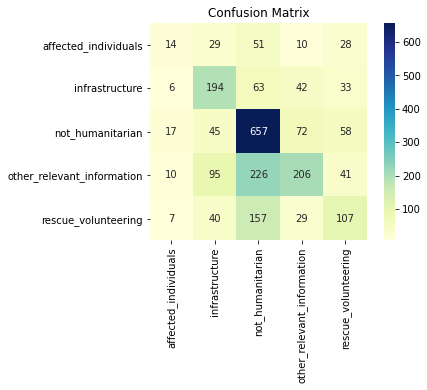

In [ ]:
import seaborn as sns;

confusion = metrics.confusion_matrix(true_labels, predictions)


ticks = ['affected_individuals', 'infrastructure',
         'not_humanitarian', 'other_relevant_information',
         'rescue_volunteering']

plt.title('Confusion Matrix')
ax = sns.heatmap(confusion, annot=True, fmt="d", cmap="YlGnBu", square=True,
                 xticklabels=ticks, yticklabels=ticks)

In [ ]:
print(len(train_dataset), len(dev_dataset), len(test_dataset))

13608 2237 2237


In [ ]:
metrics.accuracy_score(true_labels, predictions)

0.5265981224854717

In [ ]:
metrics.f1_score(true_labels, predictions, average='macro')

0.42448501211138556

In [ ]:
metrics.precision_score(true_labels, predictions, average='macro')

0.4569076294407236

In [ ]:
metrics.recall_score(true_labels, predictions, average='macro')

0.4249967919288039

## Extract Last Layer Feature

In [ ]:
model.classifier._modules['6'][0]
model.classifier._modules['3']

Linear(in_features=4096, out_features=4096, bias=True)

In [ ]:
class ImageDatasetExtract(Dataset):

    def __init__(self, tsv_file, root_dir):
        """
        Args:
            tsv_file (string): Path to the train/test/dev split tsv file
            root_dir (string): Directory with all the images.
        """
        self.file_df = pd.read_csv(tsv_file, sep='\t')
        self.root_dir = root_dir
        self.normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        self.resize = transforms.Resize(256)
        self.center = transforms.CenterCrop(224)
        self.to_tensor = transforms.ToTensor()

    def __len__(self):
        return len(self.file_df)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.file_df.iloc[idx, 4])
        image = Image.open(img_name).convert('RGB')
        
        image = self.resize(image)
        image = self.center(image)
        
        image = self.to_tensor(image)
        image = self.normalize(image)
        
        # Get the label
        label = label_map[self.file_df.iloc[idx, 5]]
        
        tid = self.file_df.iloc[idx, 1]
        
        return image, label, tid

In [ ]:
num_classes = 5
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_dataset = ImageDatasetExtract('./data/crisis-mmd/task_humanitarian_text_img_train.tsv',
                             './data/crisis-mmd')
dev_dataset = ImageDatasetExtract('./data/crisis-mmd/task_humanitarian_text_img_dev.tsv',
                             './data/crisis-mmd')
test_dataset = ImageDatasetExtract('./data/crisis-mmd/task_humanitarian_text_img_test.tsv',
                             './data/crisis-mmd')

In [ ]:
batch_size = 32

train_dataset_loader = torch.utils.data.DataLoader(train_dataset,
                                                  batch_size=batch_size,
                                                  shuffle=True,
                                                  num_workers=4)

dev_dataset_loader = torch.utils.data.DataLoader(dev_dataset,
                                                  batch_size=batch_size,
                                                  shuffle=True,
                                                  num_workers=4)

test_dataset_loader = torch.utils.data.DataLoader(test_dataset,
                                                  batch_size=batch_size,
                                                  shuffle=True,
                                                  num_workers=4)

In [ ]:
model = models.vgg16(pretrained=True)

# Freeze model weights
for param in model.parameters():
    param.requires_grad = False
    
# Add on classifier
model.classifier[6] = nn.Sequential(
                      nn.Linear(4096, 256), 
                      nn.ReLU(), 
                      nn.Dropout(0.4),
                      nn.Linear(256, num_classes))

model.load_state_dict(torch.load('./output/best_weights.pk'))
model = model.to(device)

In [ ]:
output_256 = []
output_256_tid = []

def get_output(self, input, output):
    cur_output = output.data.detach().cpu().numpy()
    for i in range(cur_output.shape[0]):
        output_256.append(cur_output[i, :])

model.classifier._modules['6'][0].register_forward_hook(get_output)

In [ ]:
for inputs, labels, tids in tqdm(test_dataset_loader):
    inputs = inputs.to(device)
    labels = labels.to(device)
    output_256_tid.extend(tids.detach().cpu().numpy().tolist())

    outputs = model(inputs)

100%|██████████| 70/70 [00:08<00:00,  7.94it/s]


In [ ]:
np.savez_compressed('./data/image_embedding_256_test.npz',
                    image_embedding=output_256,
                    image_tweetID=output_256_tid)

In [ ]:
model = models.vgg16(pretrained=True)

# Freeze model weights
for param in model.parameters():
    param.requires_grad = False
    
# Add on classifier
model.classifier[6] = nn.Sequential(
                      nn.Linear(4096, 256), 
                      nn.ReLU(), 
                      nn.Dropout(0.4),
                      nn.Linear(256, num_classes))

model.load_state_dict(torch.load('./output/best_weights.pk'))
model = model.to(device)

output_256 = []
output_256_tid = []

def get_output(self, input, output):
    cur_output = output.data.detach().cpu().numpy()
    for i in range(cur_output.shape[0]):
        output_256.append(cur_output[i, :])

model.classifier._modules['6'][0].register_forward_hook(get_output)

for inputs, labels, tids in tqdm(dev_dataset_loader):
    inputs = inputs.to(device)
    labels = labels.to(device)
    output_256_tid.extend(tids.detach().cpu().numpy().tolist())

    outputs = model(inputs)

 76%|███████▌  | 53/70 [00:06<00:02,  8.47it/s]/nethome/zwang3049/jay/miniconda3/envs/nlp/lib/python3.7/site-packages/PIL/Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 70/70 [00:08<00:00,  7.89it/s]


In [ ]:
print(len(output_256_tid), len(output_256))

2237 2237


In [ ]:
np.savez_compressed('./data/image_embedding_256_dev.npz',
                    image_embedding=output_256,
                    image_tweetID=output_256_tid)

In [ ]:
model = models.vgg16(pretrained=True)

# Freeze model weights
for param in model.parameters():
    param.requires_grad = False
    
# Add on classifier
model.classifier[6] = nn.Sequential(
                      nn.Linear(4096, 256), 
                      nn.ReLU(), 
                      nn.Dropout(0.4),
                      nn.Linear(256, num_classes))

model.load_state_dict(torch.load('./output/best_weights.pk'))
model = model.to(device)

output_256 = []
output_256_tid = []

def get_output(self, input, output):
    cur_output = output.data.detach().cpu().numpy()
    for i in range(cur_output.shape[0]):
        output_256.append(cur_output[i, :])

model.classifier._modules['6'][0].register_forward_hook(get_output)

for inputs, labels, tids in tqdm(train_dataset_loader):
    inputs = inputs.to(device)
    labels = labels.to(device)
    output_256_tid.extend(tids.detach().cpu().numpy().tolist())

    outputs = model(inputs)

 81%|████████  | 344/426 [00:42<00:09,  8.85it/s]/nethome/zwang3049/jay/miniconda3/envs/nlp/lib/python3.7/site-packages/PIL/Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 426/426 [00:51<00:00,  8.19it/s]


In [ ]:
print(len(output_256_tid), len(output_256))

13608 13608


In [ ]:
np.savez_compressed('./data/image_embedding_256_train.npz',
                    image_embedding=output_256,
                    image_tweetID=output_256_tid)

In [ ]:
tt = np.load('./data/image_embedding_256_test.npz')

In [ ]:
tt['image_embedding'].shape

(2237, 256)

In [ ]:
tt['image_tweetID'].shape

(2237,)

## Extract Classification Probabilities

In [ ]:
model = models.vgg16(pretrained=True)

# Freeze model weights
for param in model.parameters():
    param.requires_grad = False
    
# Add on classifier
model.classifier[6] = nn.Sequential(
                      nn.Linear(4096, 256), 
                      nn.ReLU(), 
                      nn.Dropout(0.4),
                      nn.Linear(256, num_classes))

model.load_state_dict(torch.load('./output/best_weights.pk'))
model = model.to(device)

In [ ]:
class ImageDatasetExtract(Dataset):

    def __init__(self, tsv_file, root_dir):
        """
        Args:
            tsv_file (string): Path to the train/test/dev split tsv file
            root_dir (string): Directory with all the images.
        """
        self.file_df = pd.read_csv(tsv_file, sep='\t')
        self.root_dir = root_dir
        self.normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        self.resize = transforms.Resize(256)
        self.center = transforms.CenterCrop(224)
        self.to_tensor = transforms.ToTensor()

    def __len__(self):
        return len(self.file_df)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.file_df.iloc[idx, 4])
        image = Image.open(img_name).convert('RGB')
        
        image = self.resize(image)
        image = self.center(image)
        
        image = self.to_tensor(image)
        image = self.normalize(image)
        
        # Get the label
        label = label_map[self.file_df.iloc[idx, 5]]
        
        tid = self.file_df.iloc[idx, 1]
        
        return image, label, tid

In [ ]:
num_classes = 5
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_dataset = ImageDatasetExtract('./data/crisis-mmd/task_humanitarian_text_img_train.tsv',
                             './data/crisis-mmd')
dev_dataset = ImageDatasetExtract('./data/crisis-mmd/task_humanitarian_text_img_dev.tsv',
                             './data/crisis-mmd')
test_dataset = ImageDatasetExtract('./data/crisis-mmd/task_humanitarian_text_img_test.tsv',
                             './data/crisis-mmd')

In [ ]:
batch_size = 32

train_dataset_loader = torch.utils.data.DataLoader(train_dataset,
                                                  batch_size=batch_size,
                                                  shuffle=True,
                                                  num_workers=4)

dev_dataset_loader = torch.utils.data.DataLoader(dev_dataset,
                                                  batch_size=batch_size,
                                                  shuffle=True,
                                                  num_workers=4)

test_dataset_loader = torch.utils.data.DataLoader(test_dataset,
                                                  batch_size=batch_size,
                                                  shuffle=True,
                                                  num_workers=4)

In [ ]:
# Test set

test_probs = []
test_probs_tids = []

for inputs, labels, tids in tqdm(test_dataset_loader):
    inputs = inputs.to(device)
    labels = labels.to(device)

    outputs = model(inputs)
    softmax_outputs = nn.functional.softmax(outputs, dim=1).detach().cpu().numpy()
    test_probs.append(softmax_outputs)
    
    test_probs_tids.extend(tids.detach().cpu().numpy().tolist())

test_probs = np.vstack(test_probs)

100%|██████████| 70/70 [00:08<00:00,  8.27it/s]


In [ ]:
np.savez_compressed('./data/image_predict_probs_test.npz',
                    predict_probs=test_probs,
                    image_tweetID=test_probs_tids)

In [ ]:
# Training set

test_probs = []
test_probs_tids = []

for inputs, labels, tids in tqdm(train_dataset_loader):
    inputs = inputs.to(device)
    labels = labels.to(device)

    outputs = model(inputs)
    softmax_outputs = nn.functional.softmax(outputs, dim=1).detach().cpu().numpy()
    test_probs.append(softmax_outputs)
    
    test_probs_tids.extend(tids.detach().cpu().numpy().tolist())

test_probs = np.vstack(test_probs)

np.savez_compressed('./data/image_predict_probs_train.npz',
                    predict_probs=test_probs,
                    image_tweetID=test_probs_tids)

 83%|████████▎ | 354/426 [00:42<00:09,  7.31it/s]/nethome/zwang3049/jay/miniconda3/envs/nlp/lib/python3.7/site-packages/PIL/Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 426/426 [00:51<00:00,  8.33it/s]


In [ ]:
# Developing set

test_probs = []
test_probs_tids = []

for inputs, labels, tids in tqdm(dev_dataset_loader):
    inputs = inputs.to(device)
    labels = labels.to(device)

    outputs = model(inputs)
    softmax_outputs = nn.functional.softmax(outputs, dim=1).detach().cpu().numpy()
    test_probs.append(softmax_outputs)
    
    test_probs_tids.extend(tids.detach().cpu().numpy().tolist())

test_probs = np.vstack(test_probs)

np.savez_compressed('./data/image_predict_probs_dev.npz',
                    predict_probs=test_probs,
                    image_tweetID=test_probs_tids)

 13%|█▎        | 9/70 [00:01<00:16,  3.63it/s]/nethome/zwang3049/jay/miniconda3/envs/nlp/lib/python3.7/site-packages/PIL/Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 70/70 [00:08<00:00,  8.37it/s]


In [ ]:
len(test_probs_tids)

13608

In [ ]:
data = np.load('./data/image_predict_probs_test.npz')
print(data['predict_probs'].shape)
print(data['image_tweetID'].shape)

(2237, 5)
(2237,)


## MMHS150K Dataset

### 1. Train the Model

In [ ]:
from json import load, dump

In [ ]:
labels = load(open('./MMHS150K_GT.json', 'r'))

In [ ]:
binary_labels = {}

for k in labels:
    binary_labels[k] = int(labels[k]['labels'].count(0) <= 1)

In [ ]:
splits = {}

for name in ['train', 'val', 'test']:
    with open('./splits/{}_ids.txt'.format(name)) as fp:
        lines = [l.replace('\n', '') for l in fp.readlines()]
        splits[name] = lines

In [ ]:
Counter([binary_labels[k] for k in binary_labels])

Counter({1: 36978, 0: 112845})

In [ ]:
sub_labels = {'train': [], 'val': [], 'test': []}

for n in ['train', 'val', 'test']:
    for l in splits[n]:
        sub_labels[n].append(binary_labels[l])

(array([105346.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  29477.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

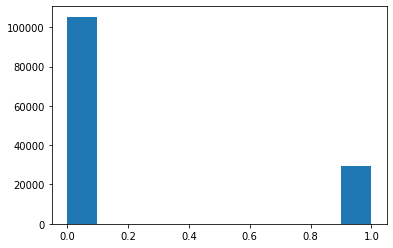

In [ ]:
plt.hist(sub_labels['train'])

In [ ]:
def image_transform(image):

    h, w, _ = image.shape
    target_len = 299
    padded_image = np.zeros((target_len, target_len, 3)).astype(int)


    if w > h:
        # Resize to [] x 299
        image = cv2.resize(image, (target_len, math.floor(h / (w / target_len))))
        short_len = image.shape[0]

        # Pad to 299 x 299
        padded_image[math.floor((target_len - short_len) / 2):
                     math.floor((target_len - short_len) / 2) + short_len,
                     :, :] = image
    else:
        # Resize to 299 x []
        image = cv2.resize(image, (math.floor(w / (h / target_len)), target_len))
        short_len = image.shape[1]

        # Pad to 299 x 299
        padded_image[:, math.floor((target_len - short_len) / 2):
                     math.floor((target_len - short_len) / 2) + short_len,
                     :] = image
    
    return padded_image

image = cv2.imread('./mmhs150k-img/{}.jpg'.format('1114679353714016256'))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

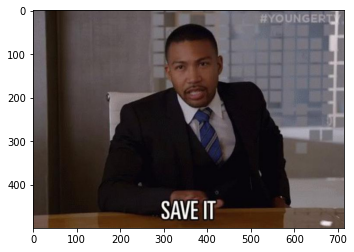

In [ ]:
plt.imshow(image)
plt.show()

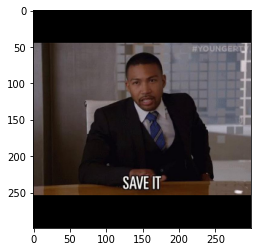

In [ ]:
plt.imshow(image_transform(image))
plt.show()

In [ ]:
class ImageDataset(Dataset):

    def __init__(self, ids, root_dir):
        """
        Args:
            tsv_file (string): Path to the train/test/dev split tsv file
            root_dir (string): Directory with all the images.
        """
        self.ids = ids
        self.root_dir = root_dir
        self.normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        self.resize = transforms.Resize(256)
        self.center = transforms.CenterCrop(224)
        self.to_tensor = transforms.ToTensor()

    def __len__(self):
        return len(self.ids)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir, '{}.jpg'.format(self.ids[idx]))
        image = Image.open(img_name).convert('RGB')
        
        image = self.resize(image)
        image = self.center(image)
        
        image = self.to_tensor(image)
        image = self.normalize(image)
        
        # Get the label
        label = binary_labels[self.ids[idx]]
        
        return image, label

In [ ]:
train_dataset = ImageDataset(splits['train'], './mmhs150k-img')

In [ ]:
for i in train_dataset:
    print(i[0].shape, i[1])
    break

torch.Size([3, 224, 224]) 1


In [ ]:
num_classes = 2
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_dataset = ImageDataset(splits['train'], './mmhs150k-img')
dev_dataset = ImageDataset(splits['val'], './mmhs150k-img')
test_dataset = ImageDataset(splits['test'], './mmhs150k-img')

In [ ]:
batch_size = 32

train_dataset_loader = torch.utils.data.DataLoader(train_dataset,
                                                   batch_size=batch_size,
                                                   shuffle=True,
                                                   num_workers=4)
dev_dataset_loader = torch.utils.data.DataLoader(dev_dataset,
                                                 batch_size=batch_size,
                                                 shuffle=True,
                                                 num_workers=4)
test_dataset_loader = torch.utils.data.DataLoader(test_dataset,
                                                  batch_size=batch_size,
                                                  shuffle=True,
                                                  num_workers=4)

In [ ]:
for inputs, labels in train_dataset_loader:
    print(inputs.shape, torch.max(inputs), labels)
    break

torch.Size([32, 3, 224, 224]) tensor(2.6400) tensor([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 0, 1, 0, 0])


In [ ]:
torch.Tensor([1,2])

tensor([1., 2.])

In [ ]:
def train_model(model, dataloaders, criterion, optimizer, num_epochs=25, patience=20):
    val_acc_history = []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    best_f1 = 0
    
    # Early stopping
    es_counter = 0
    es = False

    for epoch in range(num_epochs):
        if es:
            break

        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0
            
            running_predicts = []
            running_labels = []

            # Iterate over data.
            for inputs, labels in tqdm(dataloaders[phase], desc=phase):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    # Get model outputs and calculate loss
                    # Special case for inception because in training it has an auxiliary output. In train
                    #   mode we calculate the loss by summing the final output and the auxiliary output
                    #   but in testing we only consider the final output.

                    outputs = model(inputs)
                    loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                
                running_predicts.extend(preds.tolist())
                running_labels.extend(labels.data.tolist())

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val':
                # Compute F1 score
                y_true = torch.Tensor(running_labels)
                y_pred = torch.Tensor(running_predicts)
                tp = (y_true * y_pred).sum().to(torch.float32)
                tn = ((1 - y_true) * (1 - y_pred)).sum().to(torch.float32)
                fp = ((1 - y_true) * y_pred).sum().to(torch.float32)
                fn = (y_true * (1 - y_pred)).sum().to(torch.float32)

                epsilon = 1e-7

                precision = tp / (tp + fp + epsilon)
                recall = tp / (tp + fn + epsilon)

                f1 = 2 * (precision*recall) / (precision + recall + epsilon)
                
                print(f1)
    
                if f1 > best_f1:
                    best_f1 = f1
                    best_model_wts = copy.deepcopy(model.state_dict())
                    es_counter = 0
                else:
                    es_counter += 1
                    if es_counter > patience:
                        es = True

                val_acc_history.append(epoch_acc)

        print()

    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history

In [ ]:
model = models.vgg16(pretrained=True)

# Freeze model weights
for param in model.parameters():
    param.requires_grad = False
    
# Add on classifier
model.classifier[6] = nn.Sequential(
                      nn.Linear(4096, 256), 
                      nn.ReLU(), 
                      nn.Dropout(0.4),
                      nn.Linear(256, num_classes))

model = model.to(device)

params_to_update = [p for p in model.parameters() if p.requires_grad]

# Observe that all parameters are being optimized
optimizer_ft = optim.Adam(params_to_update, lr=1e-4)
criterion = nn.CrossEntropyLoss()

In [ ]:
# dataloaders = {'train': train_dataset_loader,
#                'val': dev_dataset_loader}

# model, val_acc_history = train_model(model, dataloaders, criterion,
#                                      optimizer_ft, num_epochs=200,
#                                      patience=30)

# #torch.save(model.state_dict(), './output/best_weights_mmhs150k.pk')
# # dump(val_acc_history, open('./output/val_acc_history.json', 'w'))

## 3. Analysis

In [ ]:
num_classes = 2
model = models.vgg16(pretrained=True)

# Freeze model weights
for param in model.parameters():
    param.requires_grad = False
    
# Add on classifier
model.classifier[6] = nn.Sequential(
                      nn.Linear(4096, 256), 
                      nn.ReLU(), 
                      nn.Dropout(0.4),
                      nn.Linear(256, num_classes))

model.load_state_dict(torch.load('./output/best_weights_mmhs150k.pk'))
model = model.to(device)

In [ ]:
batch_size = 32

test_dataset_loader = torch.utils.data.DataLoader(test_dataset,
                                                  batch_size=batch_size,
                                                  shuffle=True,
                                                  num_workers=4)

In [ ]:
predictions = []
true_labels = []
criterion = nn.CrossEntropyLoss()

for inputs, labels in tqdm(test_dataset_loader):
    inputs = inputs.to(device)
    labels = labels.to(device)


    outputs = model(inputs)

    _, preds = torch.max(outputs, 1)
    
    predictions.extend(preds.cpu().numpy().tolist())
    true_labels.extend(labels.cpu().numpy().tolist())


100%|██████████| 313/313 [00:23<00:00, 13.16it/s]


In [ ]:
confusion = metrics.confusion_matrix(true_labels, predictions)

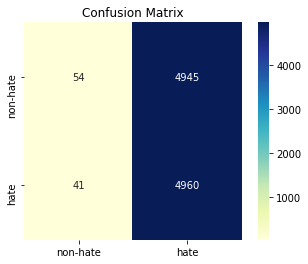

In [ ]:
import seaborn as sns;

ticks = ['non-hate', 'hate']

plt.title('Confusion Matrix')
ax = sns.heatmap(confusion, annot=True, fmt="d", cmap="YlGnBu", square=True,
                 xticklabels=ticks, yticklabels=ticks)

In [ ]:
Counter(predictions)

Counter({1: 9907, 0: 93})

In [ ]:
print(len(train_dataset), len(dev_dataset), len(test_dataset))

134823 5000 10000


In [ ]:
metrics.accuracy_score(true_labels, predictions)

0.5008

In [ ]:
metrics.f1_score(true_labels, predictions)

0.6651462302119667

In [ ]:
metrics.precision_score(true_labels, predictions)

0.5004542242858585

In [ ]:
metrics.recall_score(true_labels, predictions)

0.9914017196560688

## Extract Last Layer Feature

In [ ]:
model.classifier._modules['6'][0]
model.classifier._modules['3']

Linear(in_features=4096, out_features=4096, bias=True)

In [ ]:
class ImageDatasetExtract(Dataset):

    def __init__(self, ids, root_dir):
        """
        Args:
            tsv_file (string): Path to the train/test/dev split tsv file
            root_dir (string): Directory with all the images.
        """
        self.ids = ids
        self.root_dir = root_dir
        self.normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        self.resize = transforms.Resize(256)
        self.center = transforms.CenterCrop(224)
        self.to_tensor = transforms.ToTensor()

    def __len__(self):
        return len(self.ids)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = img_name = os.path.join(self.root_dir, '{}.jpg'.format(self.ids[idx]))
        image = Image.open(img_name).convert('RGB')
        
        image = self.resize(image)
        image = self.center(image)
        
        image = self.to_tensor(image)
        image = self.normalize(image)
        
        # Get the label
        label = binary_labels[self.ids[idx]]
        
        tid = self.ids[idx]
        
        return image, label, tid

In [ ]:
num_classes = 2
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_dataset = ImageDatasetExtract(splits['train'], 'mmhs150k-img')
dev_dataset = ImageDatasetExtract(splits['val'], 'mmhs150k-img')
test_dataset = ImageDatasetExtract(splits['test'], 'mmhs150k-img')

In [ ]:
batch_size = 32

train_dataset_loader = torch.utils.data.DataLoader(train_dataset,
                                                  batch_size=batch_size,
                                                  shuffle=True,
                                                  num_workers=4)

dev_dataset_loader = torch.utils.data.DataLoader(dev_dataset,
                                                  batch_size=batch_size,
                                                  shuffle=True,
                                                  num_workers=4)

test_dataset_loader = torch.utils.data.DataLoader(test_dataset,
                                                  batch_size=batch_size,
                                                  shuffle=True,
                                                  num_workers=4)

In [ ]:
model = models.vgg16(pretrained=True)

# Freeze model weights
for param in model.parameters():
    param.requires_grad = False
    
# Add on classifier
model.classifier[6] = nn.Sequential(
                      nn.Linear(4096, 256), 
                      nn.ReLU(), 
                      nn.Dropout(0.4),
                      nn.Linear(256, num_classes))

model.load_state_dict(torch.load('./output/best_weights_mmhs150k.pk'))
model = model.to(device)

In [ ]:
output_256 = []
output_256_tid = []

def get_output(self, input, output):
    cur_output = output.data.detach().cpu().numpy()
    for i in range(cur_output.shape[0]):
        output_256.append(cur_output[i, :])

model.classifier._modules['6'][0].register_forward_hook(get_output)

In [ ]:
for inputs, labels, tids in tqdm(test_dataset_loader):
    inputs = inputs.to(device)
    labels = labels.to(device)
    output_256_tid.extend(list(tids))

    outputs = model(inputs)

100%|██████████| 313/313 [00:23<00:00, 13.37it/s]


In [ ]:
np.savez_compressed('./data/mmhs150k_image_embedding_256_test.npz',
                    image_embedding=output_256,
                    image_tweetID=output_256_tid)

In [ ]:
model = models.vgg16(pretrained=True)

# Freeze model weights
for param in model.parameters():
    param.requires_grad = False
    
# Add on classifier
model.classifier[6] = nn.Sequential(
                      nn.Linear(4096, 256), 
                      nn.ReLU(), 
                      nn.Dropout(0.4),
                      nn.Linear(256, num_classes))

model.load_state_dict(torch.load('./output/best_weights_mmhs150k.pk'))
model = model.to(device)

output_256 = []
output_256_tid = []

def get_output(self, input, output):
    cur_output = output.data.detach().cpu().numpy()
    for i in range(cur_output.shape[0]):
        output_256.append(cur_output[i, :])

model.classifier._modules['6'][0].register_forward_hook(get_output)

for inputs, labels, tids in tqdm(dev_dataset_loader):
    inputs = inputs.to(device)
    labels = labels.to(device)
    output_256_tid.extend(list(tids))

    outputs = model(inputs)

100%|██████████| 157/157 [00:11<00:00, 13.16it/s]


In [ ]:
print(len(output_256_tid), len(output_256))

5000 5000


In [ ]:
np.savez_compressed('./data/mmhs150k_image_embedding_256_dev.npz',
                    image_embedding=output_256,
                    image_tweetID=output_256_tid)

In [ ]:
model = models.vgg16(pretrained=True)

# Freeze model weights
for param in model.parameters():
    param.requires_grad = False
    
# Add on classifier
model.classifier[6] = nn.Sequential(
                      nn.Linear(4096, 256), 
                      nn.ReLU(), 
                      nn.Dropout(0.4),
                      nn.Linear(256, num_classes))

model.load_state_dict(torch.load('./output/best_weights_mmhs150k.pk'))
model = model.to(device)

output_256 = []
output_256_tid = []

def get_output(self, input, output):
    cur_output = output.data.detach().cpu().numpy()
    for i in range(cur_output.shape[0]):
        output_256.append(cur_output[i, :])

model.classifier._modules['6'][0].register_forward_hook(get_output)

for inputs, labels, tids in tqdm(train_dataset_loader):
    inputs = inputs.to(device)
    labels = labels.to(device)
    output_256_tid.extend(list(tids))

    outputs = model(inputs)

 22%|██▏       | 945/4214 [01:10<03:58, 13.71it/s]Traceback (most recent call last):
  File "/nethome/zwang3049/jay/miniconda3/envs/nlp/lib/python3.7/multiprocessing/queues.py", line 232, in _feed
    close()
  File "/nethome/zwang3049/jay/miniconda3/envs/nlp/lib/python3.7/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/nethome/zwang3049/jay/miniconda3/envs/nlp/lib/python3.7/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor
100%|██████████| 4214/4214 [05:11<00:00, 13.55it/s]


In [ ]:
print(len(output_256_tid), len(output_256))

134823 134823


In [ ]:
np.savez_compressed('./data/mmhs150k_image_embedding_256_train.npz',
                    image_embedding=output_256,
                    image_tweetID=output_256_tid)

In [ ]:
tt = np.load('./data/mmhs150k_image_embedding_256_test.npz')

In [ ]:
print(tt['image_embedding'].shape)
print(tt['image_tweetID'].shape)

(10000, 256)
(10000,)


## Extract Classification Probabilities

In [ ]:
model = models.vgg16(pretrained=True)

# Freeze model weights
for param in model.parameters():
    param.requires_grad = False
    
# Add on classifier
model.classifier[6] = nn.Sequential(
                      nn.Linear(4096, 256), 
                      nn.ReLU(), 
                      nn.Dropout(0.4),
                      nn.Linear(256, num_classes))

model.load_state_dict(torch.load('./output/best_weights_mmhs150k.pk'))
model = model.to(device)

In [ ]:
class ImageDatasetExtract(Dataset):

    def __init__(self, ids, root_dir):
        """
        Args:
            tsv_file (string): Path to the train/test/dev split tsv file
            root_dir (string): Directory with all the images.
        """
        self.ids = ids
        self.root_dir = root_dir
        self.normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        self.resize = transforms.Resize(256)
        self.center = transforms.CenterCrop(224)
        self.to_tensor = transforms.ToTensor()

    def __len__(self):
        return len(self.ids)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = img_name = os.path.join(self.root_dir, '{}.jpg'.format(self.ids[idx]))
        image = Image.open(img_name).convert('RGB')
        
        image = self.resize(image)
        image = self.center(image)
        
        image = self.to_tensor(image)
        image = self.normalize(image)
        
        # Get the label
        label = binary_labels[self.ids[idx]]
        
        tid = self.ids[idx]
        
        return image, label, tid

In [ ]:
num_classes = 2
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_dataset = ImageDatasetExtract(splits['train'], 'mmhs150k-img')
dev_dataset = ImageDatasetExtract(splits['val'], 'mmhs150k-img')
test_dataset = ImageDatasetExtract(splits['test'], 'mmhs150k-img')

In [ ]:
batch_size = 32

train_dataset_loader = torch.utils.data.DataLoader(train_dataset,
                                                  batch_size=batch_size,
                                                  shuffle=True,
                                                  num_workers=4)

dev_dataset_loader = torch.utils.data.DataLoader(dev_dataset,
                                                  batch_size=batch_size,
                                                  shuffle=True,
                                                  num_workers=4)

test_dataset_loader = torch.utils.data.DataLoader(test_dataset,
                                                  batch_size=batch_size,
                                                  shuffle=True,
                                                  num_workers=4)

In [ ]:
# Test set

test_probs = []
test_probs_tids = []

for inputs, labels, tids in tqdm(test_dataset_loader):
    inputs = inputs.to(device)
    labels = labels.to(device)

    outputs = model(inputs)
    softmax_outputs = nn.functional.softmax(outputs, dim=1).detach().cpu().numpy()
    test_probs.append(softmax_outputs)
    
    test_probs_tids.extend(list(tids))

test_probs = np.vstack(test_probs)

100%|██████████| 313/313 [00:23<00:00, 13.50it/s]


In [ ]:
np.savez_compressed('./data/mmhs150k_image_predict_probs_test.npz',
                    predict_probs=test_probs,
                    image_tweetID=test_probs_tids)

In [ ]:
# Training set

test_probs = []
test_probs_tids = []

for inputs, labels, tids in tqdm(train_dataset_loader):
    inputs = inputs.to(device)
    labels = labels.to(device)

    outputs = model(inputs)
    softmax_outputs = nn.functional.softmax(outputs, dim=1).detach().cpu().numpy()
    test_probs.append(softmax_outputs)
    
    test_probs_tids.extend(list(tids))

test_probs = np.vstack(test_probs)

np.savez_compressed('./data/mmhs150k_image_predict_probs_train.npz',
                    predict_probs=test_probs,
                    image_tweetID=test_probs_tids)

100%|██████████| 4214/4214 [05:07<00:00, 13.69it/s]


In [ ]:
# Developing set

test_probs = []
test_probs_tids = []

for inputs, labels, tids in tqdm(dev_dataset_loader):
    inputs = inputs.to(device)
    labels = labels.to(device)

    outputs = model(inputs)
    softmax_outputs = nn.functional.softmax(outputs, dim=1).detach().cpu().numpy()
    test_probs.append(softmax_outputs)
    
    test_probs_tids.extend(list(tids))

test_probs = np.vstack(test_probs)

np.savez_compressed('./data/mmhs150k_image_predict_probs_dev.npz',
                    predict_probs=test_probs,
                    image_tweetID=test_probs_tids)

100%|██████████| 157/157 [00:11<00:00, 13.32it/s]


In [ ]:
len(test_probs_tids)

13608

In [ ]:
data = np.load('./data/mmhs150k_image_predict_probs_test.npz')
print(data['predict_probs'].shape)
print(data['image_tweetID'].shape)

(10000, 2)
(10000,)


## Fake Image Dataset

In [ ]:
import urllib.request

# urllib.request.urlretrieve("http://www.digimouth.com/news/media/2011/09/google-logo.jpg", "local-filename.jpg")

In [ ]:
img_df = pd.read_csv('./verification/set_images.txt', sep='\t')

In [ ]:
img_df.head()

image_id                                          image_url  \
0  boston_fake_01                     http://i.imgur.com/LvoCC5T.jpg   
1  boston_fake_02                 http://instagram.com/p/YN7_ThPXrU/   
2  boston_fake_03  https://o.twimg.com/2/proxy.jpg?t=HBgeaHR0cDov...   
3  boston_fake_04  http://media.tumblr.com/a813460e72a178d8127b50...   
4  boston_fake_05                    http://i.imgur.com/uxAh4wwh.jpg   

  annotation   event  
0       fake  boston  
1       fake  boston  
2       fake  boston  
3       fake  boston  
4       fake  boston

In [ ]:
img_df['image_url']

0                         http://i.imgur.com/LvoCC5T.jpg
1                     http://instagram.com/p/YN7_ThPXrU/
2      https://o.twimg.com/2/proxy.jpg?t=HBgeaHR0cDov...
3      http://media.tumblr.com/a813460e72a178d8127b50...
4                        http://i.imgur.com/uxAh4wwh.jpg
                             ...                        
394      https://pbs.twimg.com/media/Bic4fA5CQAAT5KY.jpg
395      https://pbs.twimg.com/media/BialJuECIAATXE2.jpg
396      https://pbs.twimg.com/media/BiVisqpCIAAbgju.jpg
397      https://pbs.twimg.com/media/Bo-CY5ACcAAiRAw.jpg
398      https://pbs.twimg.com/media/BpJguJhIMAAQsZK.jpg
Name: image_url, Length: 399, dtype: object

In [ ]:
img_df.shape

(399, 4)

In [ ]:
for i, row in img_df.iterrows():
    try:
        urllib.request.urlretrieve(row['image_url'], './verification/imgs/{}.jpg'.format(row['image_id']))
    except:
        pass